<a href="https://colab.research.google.com/github/PrusTalbot/PrusTalbot/blob/main/%D0%97%D0%90%D0%9A%D0%9E%D0%9D%20%D0%91%D0%9E%D0%9B%D0%AC%D0%A8%D0%98%D0%A5%20%D0%A7%D0%98%D0%A1%D0%95%D0%9B%20(%D0%97%D0%91%D0%A7)%20%D0%B8%20%D0%A6%D0%95%D0%9D%D0%A2%D0%A0%D0%90%D0%9B%D0%AC%D0%9D%D0%90%D0%AF%20%D0%9F%D0%A0%D0%95%D0%94%D0%95%D0%9B%D0%AC%D0%9D%D0%90%D0%AF%20%D0%A2%D0%95%D0%9E%D0%A0%D0%95%D0%9C%D0%90%20(%D0%A6%D0%9F%D0%A2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ЗАКОН БОЛЬШИХ ЧИСЕЛ**

при увеличении размера выборки среднее значение этой выборки стремится к среднему значению генеральной совокупности.

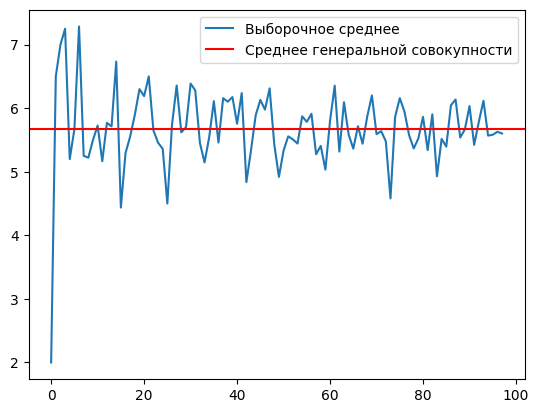

In [ ]:
import random
import numpy as np
from matplotlib import pyplot as plt

rating_general = np.array([random.randint(1, 10) for _ in range(1, 100)]) #Генерируем массив из 100 случайных чисел от 1 до 10
avg_sample_rating = []

for n in range(1, len(rating_general)):
    sample_rating = np.random.choice(rating_general, n) #Выбираем случайные n чисел. n стремится к размеру генеральной совокупности
    avg_sample_rating.append(sample_rating.sum() / n) #Сохраняем среднее выборки

plt.plot(avg_sample_rating)
plt.axhline(rating_general.mean(), color='r')
plt.legend(['Выборочное среднее', 'Среднее генеральной совокупности'])
plt.show()

**ЦЕНТРАЛЬНАЯ ПРЕДЕЛЬНАЯ ТЕОРЕМА**

 (ЦПТ) - говорит, что если мы будем несколько раз выбирать из генеральной совокупности (ГС) выборки фиксированного объема n, то распределение их средних будет совпадать со средним генеральной совокупности и приближаться к нормальному. При этом отклонение выборочных средних будет меньше отклонения генеральной совокупности.

*Если говорить проще*, то ЦПТ говорит о том, что если взять много выборок из ГС, то выборочные средние будут распределены по нормальному закону. Причём неважно, как распределены данные в самой ГС.

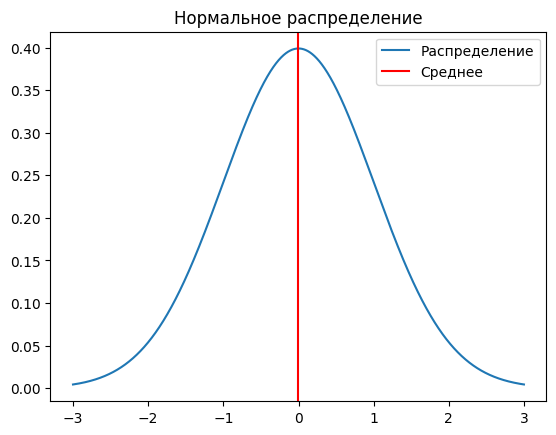

In [ ]:
from scipy.stats import norm
import numpy as np

x = np.arange(-3, 3, 0.001) # Элементы от -3 до 3
plt.plot(x, norm.pdf(x, 0, 1)) # Зададим нормальное распределение с параметрами 0, 1
plt.axvline(x.mean(), color='r') # Нарисуем среднее
plt.title('Нормальное распределение')
plt.legend(['Распределение', 'Среднее'])
plt.show()


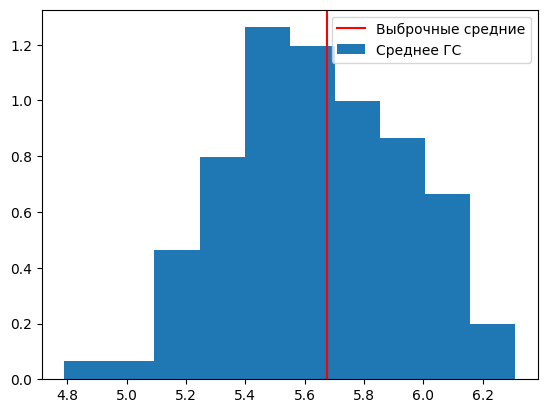

In [ ]:
avg_sample_rating= []

n_samples = 100 # Сделаем 100 случайных выборок
sample_size = 100 # Размер каждой выборки - 100 элементов

for i in range(1, n_samples):
    sample_rating= np.random.choice(rating_general, sample_size)
    avg_sample_rating.append(sample_rating.mean()) # Сохраняем среднее выборки
# Визуализируем результат
plt.hist(avg_sample_rating, density=True) # Гистограмма распределения выборочных средних
plt.axvline(rating_general.mean(), color='r') # Среднее ГС
plt.legend(['Выброчные средние', 'Среднее ГС'])
plt.show()

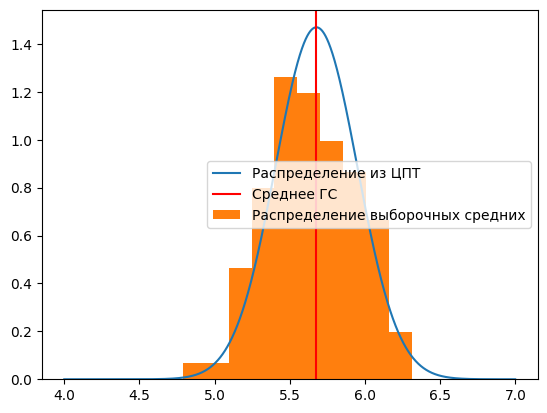

In [ ]:
sample_rating = np.random.choice(rating_general, sample_size) #Соберем одну случайную выборку из ГС
se = sample_rating.std() / np.sqrt(sample_size) # Вычислим стандартную ошибку по формуле ЦПТ

# Визуализируем
x = np.arange(4, 7, 0.001) # Значения для оси X
plt.plot(x, norm.pdf(x, rating_general.mean(), se)) # Построим нормальное распределение выборочных средних
plt.hist(avg_sample_rating, density=True) # Еще раз построим ту же гистограмму по средним выборок
plt.axvline(rating_general.mean(), color='r')
plt.legend(['Распределение из ЦПТ', 'Среднее ГС', 'Распределение выборочных средних'])
plt.show()

На основе полученных графиков мы, с одной стороны, убедились, что, имея лишь одну выборку, можно построить распределение очень похожее на распределение выборочных средних, если бы выборок было много. С другой стороны, удостоверились в том, что при достаточно большом количестве выборок их средние значения действительно распределяются нормально относительно среднего генеральной совокупности.